# UvA notebook

## Import Data

In this section we should import all the data we need. This means:
- All the liked pages and posts by users in outputs/your_data
- All the impressions seen by users in outputs/summary
- They should be in two big dataframes so we can explore them interactively in the notebook

In [10]:
import pandas as pd
import altair as alt
import os
alt.renderers.enable('notebook')
%matplotlib inline
def absoluteFilePaths(directory):
    for dirpath, _, filenames in os.walk(directory):
        for f in filenames:
            if str(f)[0] == '.':
                pass
            else:
                yield os.path.abspath(os.path.join(dirpath, f))


folder = "../outputs/fb/your_data/"
files = absoluteFilePaths(folder)

df_list = []
users = []
data = {}
for f in files:
    df = pd.read_csv(f)
    user = df.actor.iloc[0].replace(" ","").lower()
    data.update({user: df})

print(data.keys())

df = pd.concat(data.values())



df = df.set_index(pd.DatetimeIndex(df['timestamp']))
df1 = df.groupby(['actor', 'reaction', 'source', df.index.date]).count()
df1.index.names = ['actor', 'reaction', 'source', 'date']
df1.columns = ['count']
df1 = df1.reset_index()
df1.date = pd.to_datetime(df1.date)

display(df1)

dict_keys(['bjoketuinstra', 'gertjanssen', 'doortjevanderwesthuizen', 'ivovanhethoff', 'hannekehendriks', 'juultjedelange', 'aarenddejong', 'friediedijkstra', 'erwijnvanzijl'])


,actor,reaction,source,date,count
0,Aarend De Jong,LIKE,Lega - Salvini Premier,2019-11-19,8
1,Aarend De Jong,LIKE,Lega - Salvini Premier,2019-11-21,10
2,Aarend De Jong,LIKE,Lega - Salvini Premier,2019-11-23,8
3,Aarend De Jong,LIKE,Lega - Salvini Premier,2019-11-26,4
4,Aarend De Jong,LIKE,Lega - Salvini Premier,2019-11-27,9
...,...,...,...,...,...
460,Juultje De Lange,page_liked,Tgcom24,2020-01-23,1
461,Juultje De Lange,page_liked,il Post,2020-01-23,1
462,Juultje De Lange,page_liked,il manifesto,2020-01-23,1
463,Juultje De Lange,page_liked,l'UnitÃ,2020-01-23,1


## Count of reactions per user by source

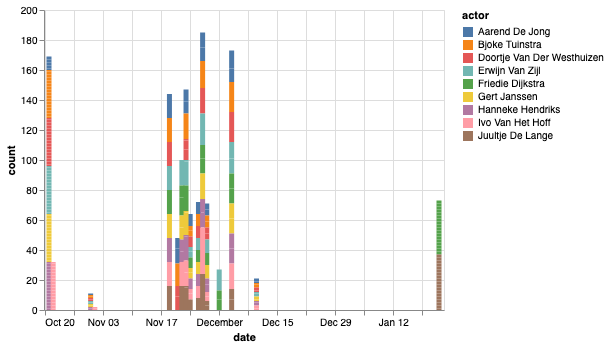

In [13]:
input_dropdown = alt.binding_select(options=list(set(df1.source.unique())))
selection = alt.selection_single(
    fields=['source'], bind=input_dropdown, name='Select an')
color = alt.condition(selection,
                      alt.Color('actor:N', legend=None),
                      alt.value('lightgray'))

alt.Chart(df1).mark_bar().encode(
    x='date:T',
    y='count:Q',
    color='actor:N',
    tooltip='count:N'
).add_selection(
    selection
).transform_filter(
    selection
)

## Count of reactions per source by user

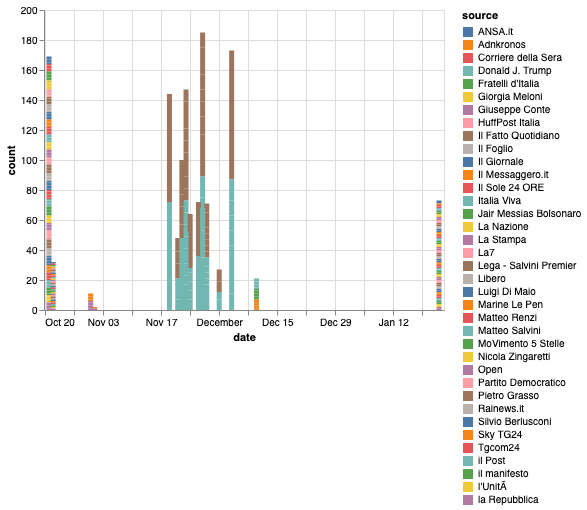

In [14]:
input_dropdown = alt.binding_select(options=list(set(df1.actor.unique())))
selection = alt.selection_single(
    fields=['actor'], bind=input_dropdown, name='Select an')
color = alt.condition(selection,
                      alt.Color('source:N', legend=None),
                      alt.value('lightgray'))

alt.Chart(df1).mark_bar().encode(
    x='date:T',
    y='count:Q',
    color='source:N',
    tooltip='count:N'
).add_selection(
    selection
).transform_filter(
    selection
)

## Plot all reactions

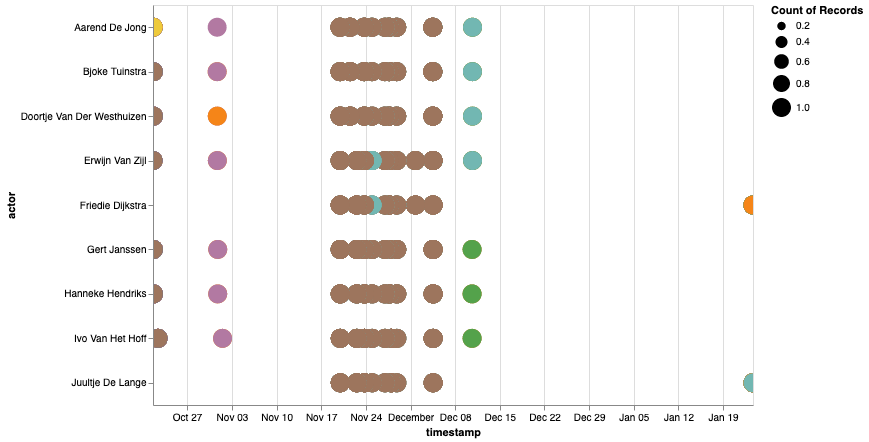

In [15]:
alt.Chart(df).mark_circle().encode(
    x='timestamp:T',
    y='actor:N',
    color=alt.Color('source:N', legend=None),
    size='count()',
    tooltip=['source:N', 'reaction:N', 'count()']
).properties(
    width=600,
    height=400
).interactive()

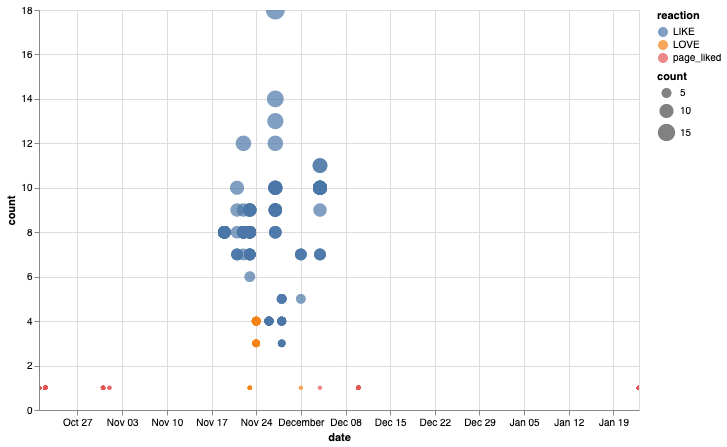

In [16]:
input_dropdown = alt.binding_select(options=list(set(df1.actor.unique())))
selection = alt.selection_single(
    fields=['actor'], bind=input_dropdown, name='Select an')
color = alt.condition(selection,
                      alt.Color('source:N', legend=None),
                      alt.value('lightgray'))

alt.Chart(df1).mark_circle().encode(
    x='date:T',
    y='count:Q',
    color=alt.Color('reaction:N'),
    size='count:Q',
    tooltip=['actor:N','source:N', 'reaction:N', 'count']
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=600,
    height=400
).interactive()



In [ ]:
#count per hour single user 
#count reactions per source by user

- who liked what and when
- import impressions, clean data
- clean data
- normalize data
- plot likes against impressions


In [28]:
alt.Chart(df1).mark_bar().encode(
        x='date:T',
        y='actor:N',
        color='reaction:N',
        size='count:Q',
        tooltip=['source:N', 'reaction:N', 'count']
    ).properties(
        width=600,
        height=400
    ).interactive()



AttributeError: 'Chart' object has no attribute 'mark_barh'